# **Software Engineer Salary Analysis**

# Project Overview:
This project focuses on analyzing a dataset containing salary information for Software Engineering roles across various companies, locations, and positions. The dataset includes key fields such as salary ranges, company ratings, job locations (including remote positions), and the date when the job postings were made.

The primary goal of this project is to clean, process, and analyze the data to uncover insights into how salary distributions vary across different factors such as location, job title, and company rating. By carefully cleaning and structuring the data, we enable meaningful exploratory data analysis (EDA) and hypothesis testing, ultimately providing valuable insights into the software engineering job market.

# Why This Project is Comprehensive for Evaluating Data Scientist Skills?
This project is designed to showcase a range of data science skills, making it a comprehensive evaluation for a data scientist's capabilities. Here’s why:

# 1. Data Cleaning and Preparation
 * **Handling Missing Data**: Missing values in the Company, Location, and Company Score columns were addressed using imputation techniques, ensuring that the dataset is complete and ready for analysis.

* **Feature Engineering:** Salary data was extracted from complex text fields, creating new Min Salary and Max Salary columns that enable detailed salary analysis. Additionally, the creation of a Country column from ambiguous location data demonstrates an ability to engineer meaningful features.

* **Date Transformation**: Relative dates (e.g., "2d", "3w") were converted into actual dates, showing proficiency in handling time-series data.

# 2. Data Wrangling and Standardization
* **Consistent Location Data**: The Location column contained inconsistent entries such as "Remote", "Unknown", and "United States". This project resolved these issues by standardizing locations and creating a new Country column.
* **Generalized Solution**: The approach to handle and replace "Unknown" and "United States" entries demonstrates the ability to create robust, scalable solutions that can be applied to a wide variety of real-world datasets.

# 3. Exploratory Data Analysis (EDA)
* **Visualizing Salary Distributions**: The project enables the exploration of salary distributions across different job titles, locations, and company ratings. This showcases the ability to use visualization tools (e.g., Matplotlib and Seaborn) to uncover patterns and trends.
* **Identifying Key Insights**: By comparing salaries across different cities, states, and remote jobs, the project highlights how salary varies across the United States, providing actionable insights for businesses and job seekers.

# 4. Hypothesis Testing and Data-Driven Insights
* **Salary Trends**: The project allows for hypothesis testing around key questions such as whether remote positions offer competitive salaries, or whether higher-rated companies tend to offer higher salaries. This demonstrates an understanding of how to draw conclusions and test assumptions from data.
* **Data-Driven Decisions**: The ability to answer questions and draw insights from the data, such as salary trends over time or across regions, showcases a data scientist’s ability to provide actionable recommendations based on evidence.

# 5. Advanced Data Manipulation
* **Handling Complex Data Types**: The project involves the transformation of string-based salary data and relative dates into numerical and standardized formats, showing proficiency in handling various types of data.
* **Outlier Detection and Handling**: The salary data often contains outliers, and the project demonstrates methods to identify and potentially handle these outliers for more robust analysis.

# 6. Communication and Documentation
* **Clear Documentation**: Each step of the data cleaning and analysis process is documented clearly, providing insight into the thought process behind data transformations and analysis. This is a key skill for data scientists when communicating with stakeholders.
* **Project Structure**: The project is well-organized, separating different stages of data cleaning, feature engineering, and analysis, making it easy for others to follow and replicate the process.

# 7. End-to-End Data Science Workflow
This project demonstrates the complete data science workflow, from data cleaning and preparation to exploratory analysis, hypothesis testing, and drawing conclusions. This end-to-end approach reflects the real-world tasks a data scientist would face, making it an excellent demonstration of essential skills.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Cleaning Steps for Software Engineer Salary Analysis**
The dataset contains information on software engineer salaries, company scores, job locations, and other related fields. To prepare the data for analysis, several key cleaning steps were performed. Below is a detailed description of each cleaning step.

In [ ]:
import pandas as pd
import numpy as np
import re
from datetime import datetime, timedelta
from statistics import median
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import title



# 1. Loading the Dataset
The dataset was first loaded into a Pandas DataFrame for easy manipulation and analysis. This step allows us to inspect the structure of the dataset and proceed with data cleaning.

In [ ]:
# loading dataset
file_path = '/content/drive/My Drive/Software Engineer Salaries Analysis/Software Engineer Salaries.csv'
df = pd.read_csv(file_path)

In [ ]:
# see the top 10 rows of the dataset
df.head(10)

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)
5,Spotify,3.9,Backend Engineer II,"New York, NY",1d,$123K - $175K (Employer est.)
6,Infor,4.0,Associate Software Engineer,"Alpharetta, GA",7d,$77K - $94K (Glassdoor est.)
7,Amerisoft Corporation,5.0,Software Developers,"Farmington Hills, MI",30d+,$71K - $100K (Glassdoor est.)
8,WHOOP,3.3,"Software Engineer II (Backend, Health)","Boston, MA",10d,$94K - $148K (Glassdoor est.)
9,PFF,4.2,Sr. Software Engineer,Remote,1d,$147K - $189K (Employer est.)


In [ ]:
# see the last 10 rows of the dataset
df.tail(10)

,Company,Company Score,Job Title,Location,Date,Salary
860,Westchester Community College,NaN,Software Development Engineer in Test,"San Francisco, CA",30d+,NaN
861,DPS Telecom,NaN,Software & System Dev. Sr. Engineer,"Raymond, OH",30d+,NaN
862,Roblox,NaN,Software Engineer II,"Valhalla, NY",3d,NaN
863,OpenAI,NaN,Embedded Software Engineer (Entry-Level),"Lake Hopatcong, NJ",2d,NaN
864,"Akina, Inc.",NaN,Senior Software Engineer - App Orchestration,"San Mateo, CA",30d+,NaN
865,RXO,NaN,"Software Engineer, Machine Learning Compute","San Francisco, CA",6d,NaN
866,Infosys,NaN,Software Engineer - 3 (Apache NiFi),"Annapolis Junction, MD",18d,NaN
867,Medtronic,NaN,Senior Software Engineer,"Southfield, MI",19d,NaN
868,NaN,NaN,Junior Python Developer,"Charlotte, NC",2d,NaN
869,NaN,NaN,GUI Software Engineer II - Surgical Robotics,"Boston, MA",10d,NaN


For the date column we need to know what are the values in order to handle them.

In [ ]:
# Check the unique values in the 'Date' column
print(df['Date'].unique())


['8d' '2d' '1d' '7d' '30d+' '10d' '5d' '6d' '13d' '3d' '4d' '9d' '22d'
 '18d' '17d' '16d' '20d' '25d' '12d' '23d' '11d' '19d' '26d' '29d' '24d'
 '15d' '24h' '27d' '30d' '21d' '14d']


# 2. Extracting Salary Information
The salary information was initially stored in a string format containing salary ranges (e.g., "$68K - $94K"). We extracted the minimum and maximum salary values and created two new columns: Min Salary and Max Salary.

* **Purpose**: To separate the salary ranges into distinct numerical values for Min Salary and Max Salary, making it easier to analyze salary data.

In [ ]:
# function to extract min and max salary
def extract_salary(salary_str):
    if isinstance(salary_str, str):
        salary_range = re.findall(r'\d+', salary_str)
        if len(salary_range) == 2:
            min_salary = int(salary_range[0])
            max_salary = int(salary_range[1])
            return min_salary, max_salary
        return None, None

In [ ]:
# apply above functionto the 'Salary' column and creat new column for Min and Max Salary
df[["Min Salary", "Max Salary"]] = df["Salary"].apply(lambda x: pd.Series(extract_salary(x)))


# 3. Handling Missing Values in 'Company' and 'Location'
* **Purpose**: To ensure that missing values in the Company and Location columns are filled with "Unknown". This step helps avoid analysis errors due to null values and ensures that missing data is handled consistently.

In [ ]:
# fill missing values in 'Company' and 'Location' column
df.fillna({"Company": "Unknown"}, inplace=True)
df.fillna({"Location": "Unknown"}, inplace=True)

# 4. Imputing Missing Values for "Company Score"
 * **Purpose**: Some entries were missing a Company Score. Instead of dropping these rows, we imputed the missing values using the median company score. The median is a robust measure for imputation, especially when dealing with outliers.

In [ ]:
# imputing missing 'Company Score' values with median score
df.fillna({"Company Score": df["Company Score"].median()}, inplace=True)


# 5. Dropping Rows with Missing Salary Information
 * **Purpose**: Since salary data is critical to the analysis, rows with missing Min Salary or Max Salary were dropped. This ensures that all further analysis related to salaries is based on complete data.

In [ ]:
# drop rows with missing Min and Max Salary
df.dropna(subset=['Min Salary', 'Max Salary'], inplace=True)

# 6. Converting Relative Dates to Actual Dates
The Date column initially contained relative time information (e.g., "2d" for two days ago or "3w" for three weeks ago). To make the data more useful, we converted these relative dates into actual dates.

 * **Purpose:** To standardize the Date column by converting relative dates into absolute dates, making the data ready for time-based analysis.

In [ ]:
# Convert relative dates to actual dates
#current_date = datetime.now()

def convert_relative_date(date_str):
    current_date = datetime.now()  # Get the current date
    if pd.isna(date_str):
        return None  # Handle missing values
    if isinstance(date_str, str):
        date_str = date_str.replace('+', '').strip()  # Remove any '+' symbols and extra spaces
        if 'd' in date_str:  # Handle days ago
            days_ago = int(date_str.replace('d', ''))
            return current_date - timedelta(days=days_ago)
            # Handle weeks ago
        elif 'w' in date_str:
            weeks_ago = int(date_str.replace('w', ''))
            return current_date - timedelta(weeks=weeks_ago)
        elif 'h' in date_str:  # Handle hours ago
            hours_ago = int(date_str.replace('h', ''))
            return current_date - timedelta(hours=hours_ago)
    return None

In [ ]:
# Convert the relative dates
df['Date'] = df['Date'].apply(convert_relative_date)

In [ ]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Min Salary,Max Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",2024-10-16 18:36:19.713861,$68K - $94K (Glassdoor est.),68.0,94.0
1,Workiva,4.3,Software Support Engineer,Remote,2024-10-22 18:36:19.713899,$61K - $104K (Employer est.),61.0,104.0
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2024-10-22 18:36:19.713904,$95K - $118K (Glassdoor est.),95.0,118.0
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2024-10-22 18:36:19.713908,$97K - $145K (Employer est.),97.0,145.0
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2024-10-22 18:36:19.713912,$85K - $108K (Glassdoor est.),85.0,108.0


# 7. Handling "Unknown", "Remote", and "United States" in the Location Column
The Location column contained various location types such as "Remote", "Unknown", and "United States". We cleaned up this inconsistency by:



1.   Replacing "Unknown" with "Remote" since the country is known to be the United States
2.   Creating a new Country column where:
  *   Remote is assigned "United States".
  *   Locations containing "United States" are also assigned "United States".


 * **Purpose**: To standardize the Location column and create a separate Country column for more granular location-based analysis.

In [ ]:
# Create a new 'Country' column based on 'Location'
def get_country(location):
    if 'United States' in location:
        return 'United States'
    elif 'Remote' in location:
        return 'United States'  #Remote = United States
    else:
        # You can add more conditions for other countries here if needed
        return 'United States'

In [ ]:
# Apply the function to create the 'Country' column
df['Country'] = df['Location'].apply(get_country)

In [ ]:
# Replace 'Unknown' with 'Remote' in the 'Location' column
df['Location'] = df['Location'].replace('Unknown', 'Remote')
df['Location'] =df['Location'].replace('United States', 'Remote')

In [ ]:
# Display the updated dataframe
print(df[['Location', 'Country']].head())


          Location        Country
0     Manassas, VA  United States
1           Remote  United States
2         Cary, NC  United States
3  Los Angeles, CA  United States
4       Seguin, TX  United States


# 8. Saving the Cleaned Dataset
Finally, the cleaned dataset is saved as a new CSV file for further analysis and visualization.

In [ ]:
# save cleaned dataset to a new CSV file
cleaned_file_path = 'Software Engineer Salaries Cleaned'
df.to_csv(cleaned_file_path, index=False)
print(f"Updated dataset saved to {cleaned_file_path}")

Updated dataset saved to Software Engineer Salaries Cleaned


In [ ]:
df.head(10)

,Company,Company Score,Job Title,Location,Date,Salary,Min Salary,Max Salary,Country
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",2024-10-16 18:36:19.713861,$68K - $94K (Glassdoor est.),68.0,94.0,United States
1,Workiva,4.3,Software Support Engineer,Remote,2024-10-22 18:36:19.713899,$61K - $104K (Employer est.),61.0,104.0,United States
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2024-10-22 18:36:19.713904,$95K - $118K (Glassdoor est.),95.0,118.0,United States
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2024-10-22 18:36:19.713908,$97K - $145K (Employer est.),97.0,145.0,United States
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2024-10-22 18:36:19.713912,$85K - $108K (Glassdoor est.),85.0,108.0,United States
5,Spotify,3.9,Backend Engineer II,"New York, NY",2024-10-23 18:36:19.713915,$123K - $175K (Employer est.),123.0,175.0,United States
6,Infor,4.0,Associate Software Engineer,"Alpharetta, GA",2024-10-17 18:36:19.713918,$77K - $94K (Glassdoor est.),77.0,94.0,United States
7,Amerisoft Corporation,5.0,Software Developers,"Farmington Hills, MI",2024-09-24 18:36:19.713922,$71K - $100K (Glassdoor est.),71.0,100.0,United States
8,WHOOP,3.3,"Software Engineer II (Backend, Health)","Boston, MA",2024-10-14 18:36:19.713926,$94K - $148K (Glassdoor est.),94.0,148.0,United States
9,PFF,4.2,Sr. Software Engineer,Remote,2024-10-23 18:36:19.713930,$147K - $189K (Employer est.),147.0,189.0,United States


# **Exploratory Data Analysis (EDA)**
Exploratory Data Analysis (EDA) is a critical step in the data analysis process where we use statistical and visual methods to understand the underlying patterns and structure of the dataset. EDA helps us:

* **Identify Patterns**: Explore trends and distributions in the data, such as how salaries vary across companies, job titles, or locations.

* **Understand Relationships**: Detect relationships between different features, such as how company scores relate to salary levels.

* **Spot Anomalies**: Identify outliers or inconsistencies that might affect the analysis.

* **Guide Hypothesis Testing**: EDA allows us to generate hypotheses that can be validated through further analysis or modeling.

Below is a description of each EDA step conducted for this project.

This is the top 10 rows of the cleaned and processed dataset, ready for EDA.

In [ ]:
file_path = '/content/Software Engineer Salaries Cleaned'
df = pd.read_csv(file_path)
df.head(10)

,Company,Company Score,Job Title,Location,Date,Salary,Min Salary,Max Salary,Country
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",2024-10-16 18:36:19.713861,$68K - $94K (Glassdoor est.),68.0,94.0,United States
1,Workiva,4.3,Software Support Engineer,Remote,2024-10-22 18:36:19.713899,$61K - $104K (Employer est.),61.0,104.0,United States
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2024-10-22 18:36:19.713904,$95K - $118K (Glassdoor est.),95.0,118.0,United States
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2024-10-22 18:36:19.713908,$97K - $145K (Employer est.),97.0,145.0,United States
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2024-10-22 18:36:19.713912,$85K - $108K (Glassdoor est.),85.0,108.0,United States
5,Spotify,3.9,Backend Engineer II,"New York, NY",2024-10-23 18:36:19.713915,$123K - $175K (Employer est.),123.0,175.0,United States
6,Infor,4.0,Associate Software Engineer,"Alpharetta, GA",2024-10-17 18:36:19.713918,$77K - $94K (Glassdoor est.),77.0,94.0,United States
7,Amerisoft Corporation,5.0,Software Developers,"Farmington Hills, MI",2024-09-24 18:36:19.713922,$71K - $100K (Glassdoor est.),71.0,100.0,United States
8,WHOOP,3.3,"Software Engineer II (Backend, Health)","Boston, MA",2024-10-14 18:36:19.713926,$94K - $148K (Glassdoor est.),94.0,148.0,United States
9,PFF,4.2,Sr. Software Engineer,Remote,2024-10-23 18:36:19.713930,$147K - $189K (Employer est.),147.0,189.0,United States


# 1. Salary Distribution by Company Score
* **Purpose**: The goal is to explore the relationship between company ratings (i.e., Company Score) and the salaries offered (Max Salary). This analysis can help determine whether higher-rated companies tend to offer higher salaries.

* **Visualization**: A scatter plot is used to visualize the relationship, with Company Score on the x-axis and Max Salary on the y-axis. The color hue represents the company score, adding another dimension to the analysis.

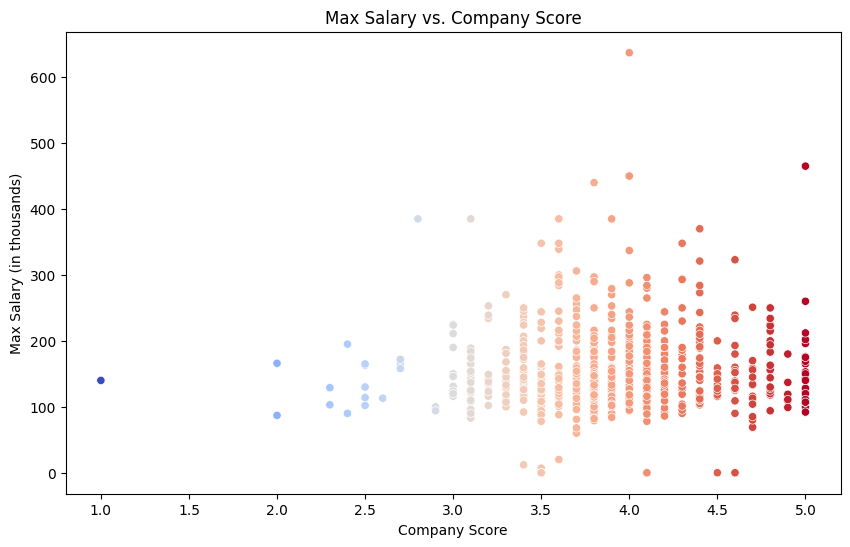

In [ ]:
# salary distribution by company score: checking if higher rated companies offer higher salaries

plt.figure(figsize=(10,6))
sns.scatterplot(x='Company Score', y='Max Salary', data=df, hue='Company Score', palette='coolwarm', legend=False)
plt.title('Max Salary vs. Company Score')
plt.xlabel('Company Score')
plt.ylabel('Max Salary (in thousands)')
plt.show()

# 2. Salary Distribution Across Locations
* **Purpose**: This analysis visualizes salary variations across the top 10 locations. It helps understand whether specific locations offer higher salaries and how salaries are distributed across different regions.

* **Visualization**: A boxplot shows the distribution of Max Salary for the top 10 most frequent locations in the dataset.

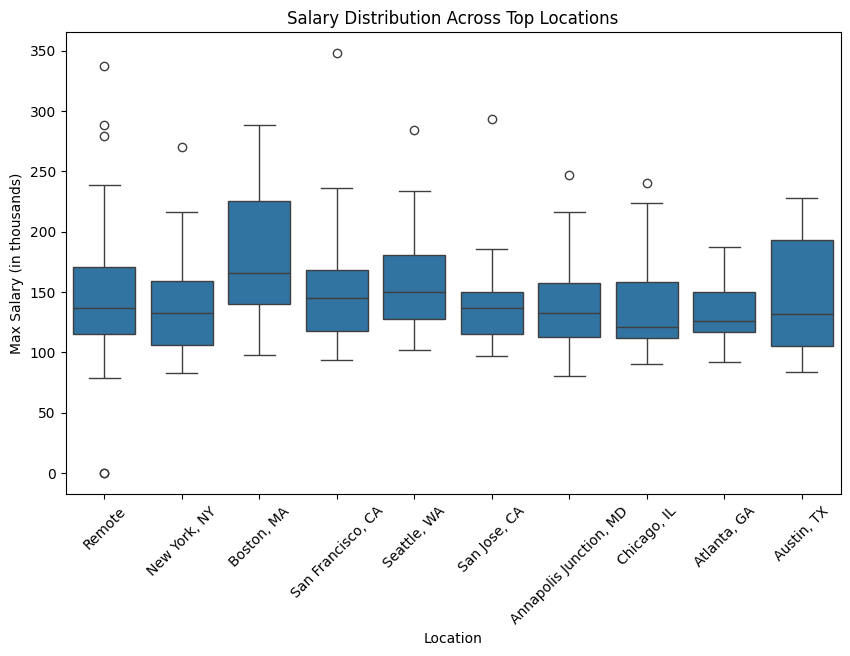

In [ ]:
# salary distribution across locations: Using boxplot to see salary variations by location
plt.figure(figsize=(10,6))
top_locations = df['Location'].value_counts().head(10).index
sns.boxplot(x='Location', y='Max Salary', data=df[df['Location'].isin(top_locations)])
plt.xticks(rotation=45)
plt.title('Salary Distribution Across Top Locations')
plt.xlabel('Location')
plt.ylabel('Max Salary (in thousands)')
plt.show()

# 3. Salary by Job Title
* **Purpose**: This analysis shows which job titles command the highest salaries. By focusing on the top 10 most frequent job titles, we can identify which roles offer the most competitive compensation.

* **Visualization**: A bar plot displays the maximum salary for each of the top 10 job titles.

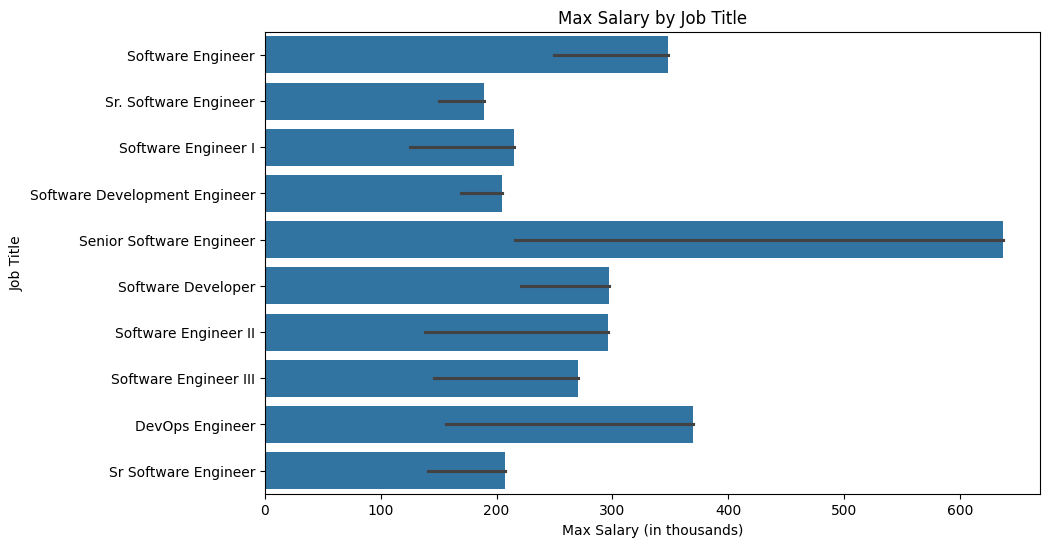

In [ ]:
# Salary by job title: which job titles have the highest salary ranges
plt.figure(figsize=(10,6))
top_titles = df['Job Title'].value_counts().head(10).index
sns.barplot(y='Job Title', x='Max Salary', data=df[df['Job Title'].isin(top_titles)], estimator=max)
plt.title('Max Salary by Job Title')
plt.xlabel('Max Salary (in thousands)')
plt.ylabel('Job Title')
plt.show()

# 4. Pairwise Correlation Analysis
* **Purpose**: This analysis helps understand the correlation between different numerical features such as Company Score, Min Salary, and Max Salary. By observing correlations, we can see if higher company scores are associated with higher salaries.

* **Visualization**: A heatmap shows the correlation between features. The cells are color-coded, and the annotations provide the correlation values.

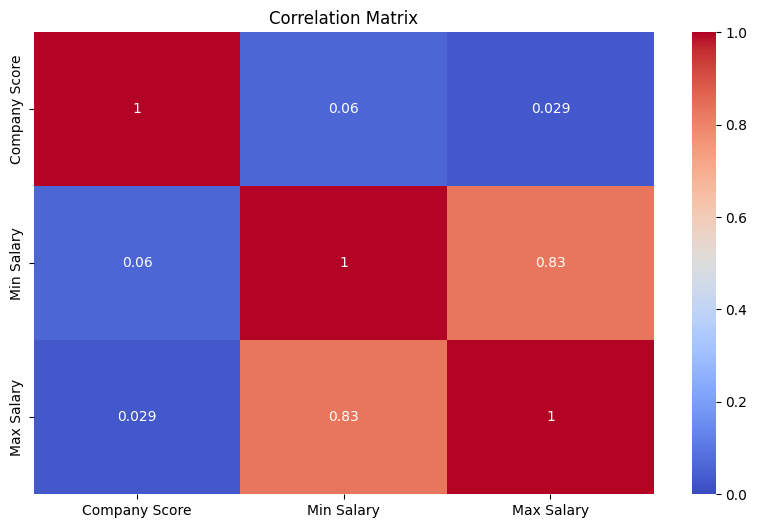

In [ ]:
# pairwise correlation analysis
plt.figure(figsize=(10,6))
sns.heatmap(df[['Company Score', 'Min Salary', 'Max Salary']].corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt,title('Correlation Matrix')
plt.show()

# 5. Box Plot of Salaries by Company Score Range
* **Purpose**: This step groups companies into different score ranges (e.g., 1-2, 2-3, etc.) to see how salaries vary across these categories. It helps understand whether higher-rated companies offer more competitive salaries.

* **Visualization**: A boxplot shows the distribution of salaries across different company score ranges.

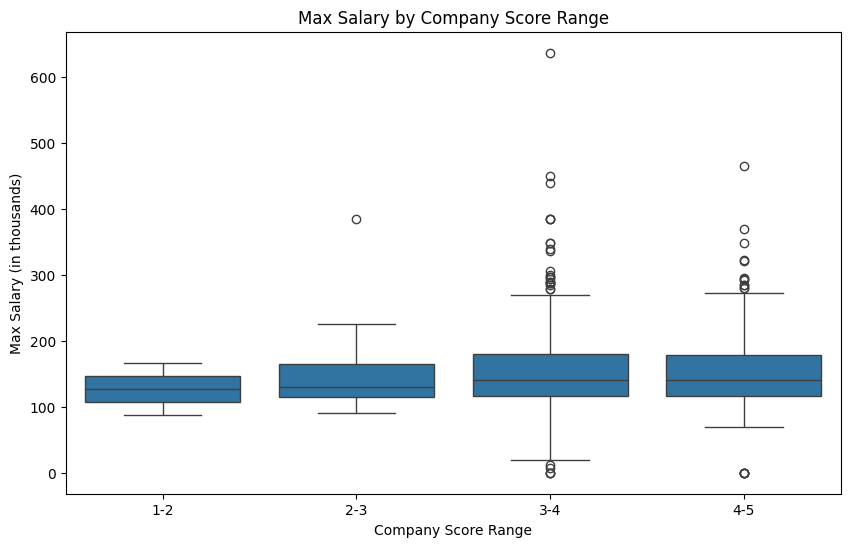

In [ ]:
# box plot of salaries by company score range
df['Company Score Range']= pd.cut(df['Company Score'], bins=[1, 2, 3, 4, 5], labels=['1-2', '2-3', '3-4', '4-5'])
plt.figure(figsize=(10,6))
sns.boxplot(x='Company Score Range', y='Max Salary', data=df)
plt.title('Max Salary by Company Score Range')
plt.xlabel('Company Score Range')
plt.ylabel('Max Salary (in thousands)')
plt.show()

# 6. Location-Based Salary Analysis
* **Purpose**: This analysis compares the average salary across different locations to identify regions offering higher average compensation. It helps visualize the geographic distribution of salaries.

* **Visualization**: A horizontal bar plot is used to show the average Max Salary for each of the top 10 locations.

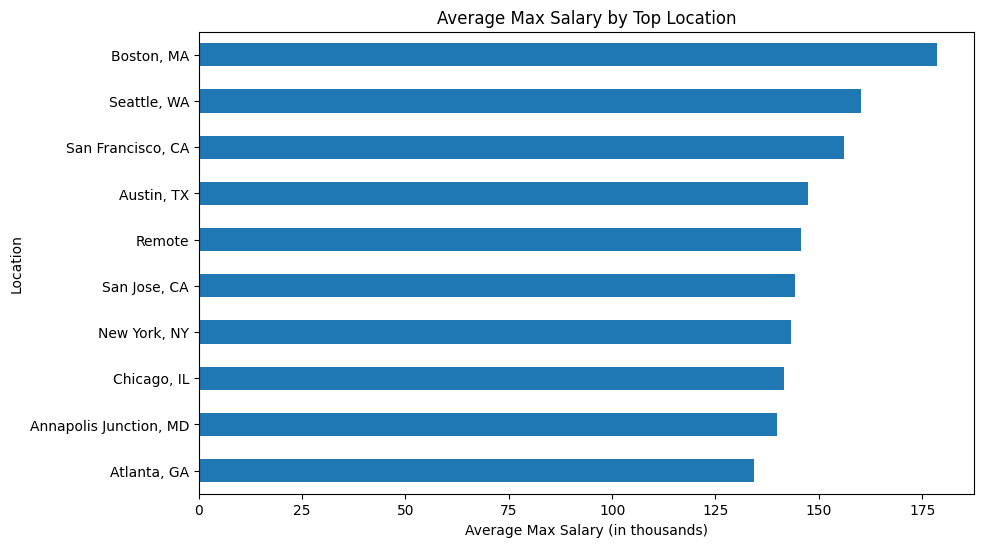

In [ ]:
# location-based analysis: compare salary distribution across different regions to see how they differ
top_location = df['Location'].value_counts().head(10).index
avg_salary_by_location = df[df['Location'].isin(top_location)].groupby('Location')['Max Salary'].mean().sort_values()

plt.figure(figsize=(10,6))
avg_salary_by_location.plot(kind='barh')
plt.title('Average Max Salary by Top Location')
plt.xlabel('Average Max Salary (in thousands)')
plt.ylabel('Location')
plt.show()

# 7. Salary Range Distribution Across Top Locations
* **Purpose**: This violin plot shows the distribution of salary ranges (difference between Max Salary and Min Salary) across different locations. It helps understand the spread of salaries within each location.

* **Visualization**: A violin plot showing the distribution of salary ranges across the top 10 locations.


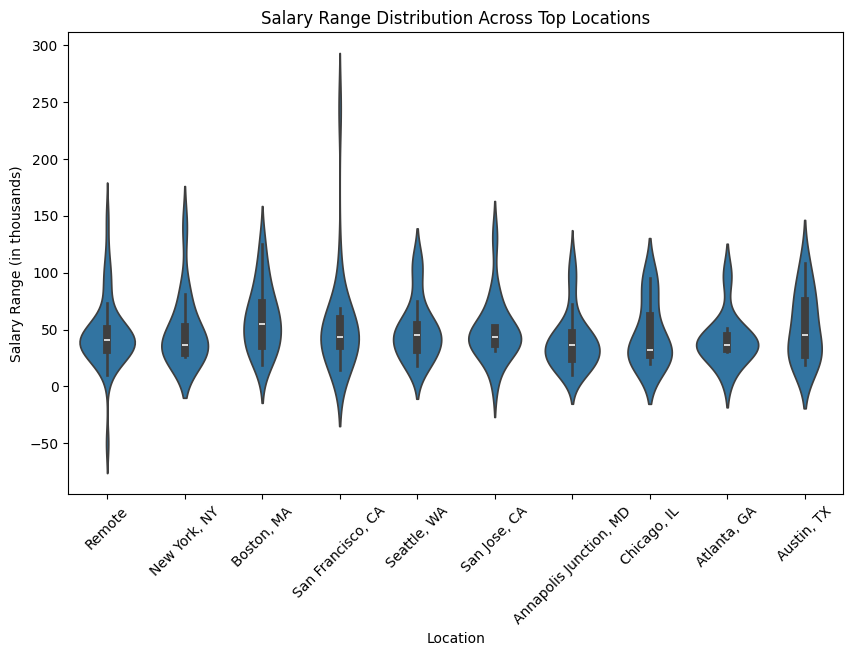

In [ ]:
# Create a new column for salary range (Max Salary - Min Salary)
df['Salary Range'] = df['Max Salary'] - df['Min Salary']

plt.figure(figsize=(10, 6))
sns.violinplot(x='Location', y='Salary Range', data=df[df['Location'].isin(top_locations)])
plt.xticks(rotation=45)
plt.title('Salary Range Distribution Across Top Locations')
plt.xlabel('Location')
plt.ylabel('Salary Range (in thousands)')
plt.show()

# 8. Remote vs. On-Site Salary Comparison
* **Purpose**: This step compares the salary distribution between remote jobs and on-site jobs. It helps analyze whether remote positions offer competitive salaries compared to traditional on-site jobs.

* **Visualization**: A boxplot compares the Max Salary between remote and on-site jobs.

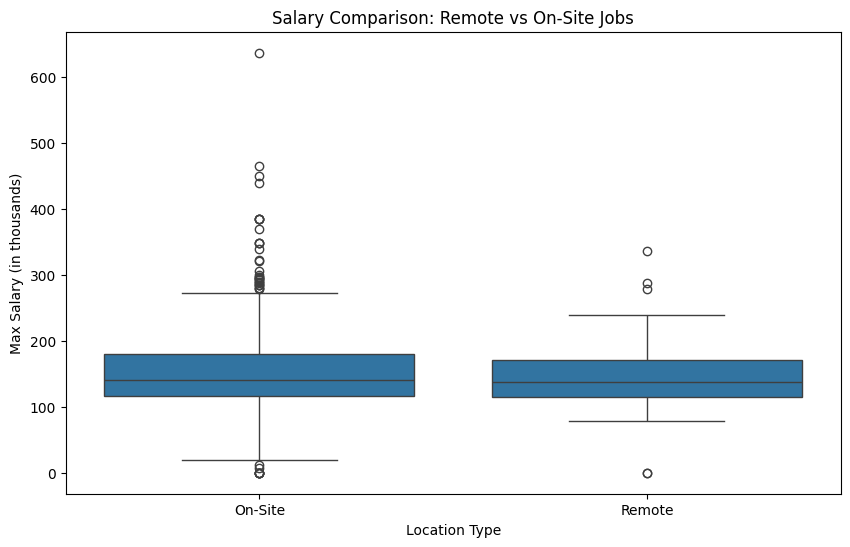

In [ ]:
# Classify jobs as Remote or On-Site
df['Location Type'] = df['Location'].apply(lambda x: 'Remote' if 'Remote' in x else 'On-Site')

# Boxplot to compare salaries between Remote and On-Site jobs
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location Type', y='Max Salary', data=df)
plt.title('Salary Comparison: Remote vs On-Site Jobs')
plt.xlabel('Location Type')
plt.ylabel('Max Salary (in thousands)')
plt.show()


# 9. Company Score vs. Max Salary for Top 10 Companies
* **Purpose**: This scatter plot visualizes the relationship between the Company Score and the Max Salary for the top 10 companies in the dataset, ranked by the number of job postings. This allows us to explore whether higher-rated companies (i.e., those with higher Company Scores) tend to offer higher maximum salaries, and to see how salary levels differ across these companies.

* **Visualization**: Each dot represents a job posting for one of the top 10 companies. The x-axis shows the company score, and the y-axis shows the maximum salary offered. The color of the dots corresponds to the company, and the size of the dots is increased to make them more prominent.

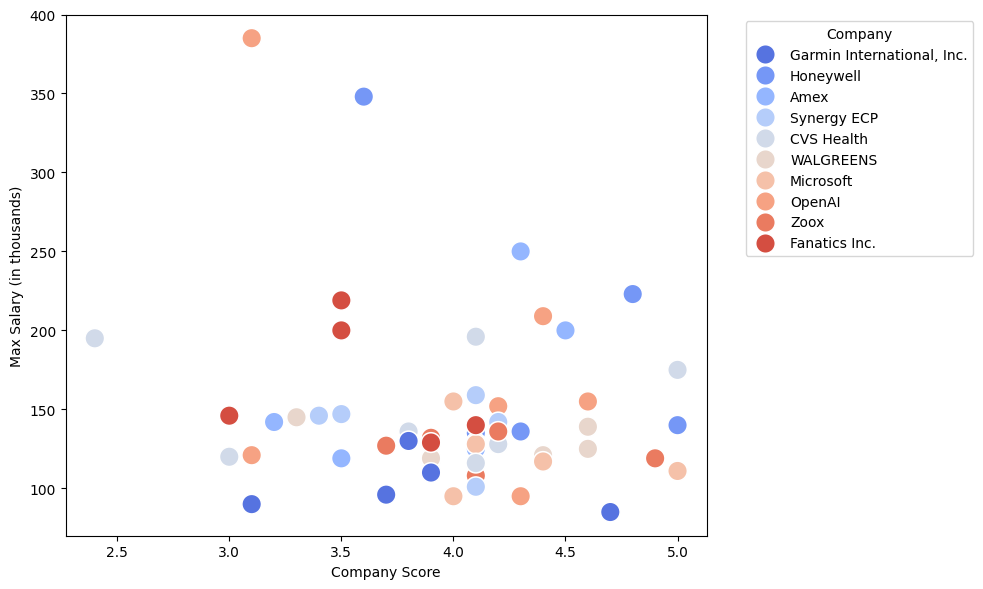

In [ ]:
# Step 1: Identify the top 10 companies based on job count
top_10_companies = df['Company'].value_counts().head(10).index

# Filter the dataset to include only the top 10 companies
df_top_10 = df[df['Company'].isin(top_10_companies)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Company Score', y='Max Salary', data=df_top_10, hue='Company', palette='coolwarm', s=200)
plt.xlabel('Company Score')
plt.ylabel('Max Salary (in thousands)')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
